In [1]:
#this script compares trajectories from both light conditions and computes complexity of path using box dimension analysis
from matplotlib import pyplot as plt
%matplotlib inline
from matplotlib import style
style.use('seaborn-talk')
from matplotlib import cm
import numpy as np
import csv
import pandas as pd
from numpy.polynomial.polynomial import polyfit
import glob 
import seaborn as sns
sns.set(style="ticks")

In [2]:
source =  r"E:\Downloads\ManducaMultiSenseData\Motion\Centroids_Filtered"
fig_path = r"E:\Downloads\ManducaMultiSenseData\Motion\Fractal_Dimension"

In [3]:
df = pd.read_csv(source + '/L0.1_c-3_m2_0_27647.csv')

In [4]:
x,y = df.X_position.values, df.Y_position.values
y_line = np.arange(0,488, (488/648))*2.4/75
x_line = np.arange(0,648, 1)*2.4/75

Text(0.5, 0, 'X Position')

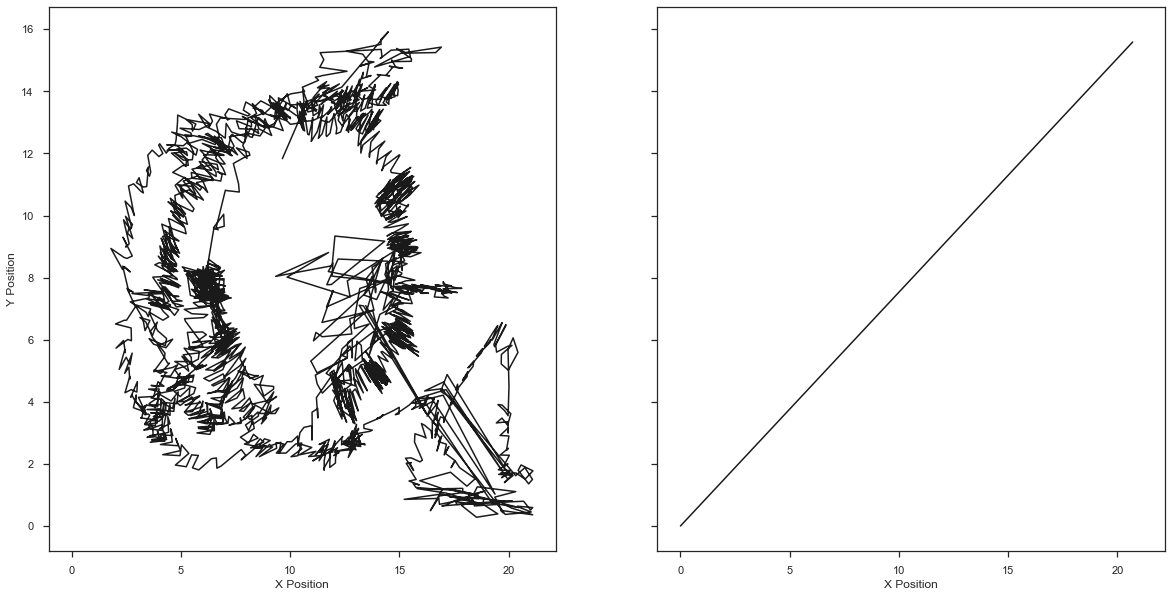

In [5]:
f, ax = plt.subplots(1,2,figsize = (20,10), sharex = True, sharey = True)
ax[0].plot(x,y, c= "k")
ax[0].set_ylabel("Y Position")
ax[0].set_xlabel("X Position")
ax[1].plot(x_line , y_line, c= "k")
ax[1].set_xlabel("X Position")

number of boxes:4 out of 4 dimension: 2.0
number of boxes:15 out of 16 dimension: 1.9534452978042594
number of boxes:52 out of 64 dimension: 1.9001465727136977
number of boxes:161 out of 256 dimension: 1.8327292195286544
number of boxes:466 out of 1024 dimension: 1.772837228930856
number of boxes:1139 out of 4096 dimension: 1.6922586719513522
number of boxes:1980 out of 16384 dimension: 1.5644692449952817
number of boxes:2519 out of 65536 dimension: 1.4123294258417802
number of boxes:2728 out of 262144 dimension: 1.268180881002686
number of boxes:2801 out of 1048576 dimension: 1.1451726268074507
number of boxes:2813 out of 4194304 dimension: 1.0416267124831544


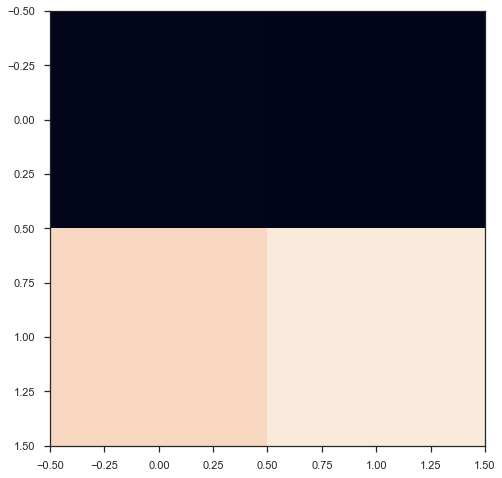

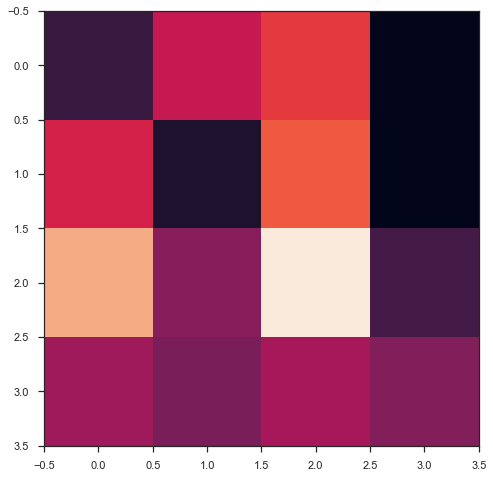

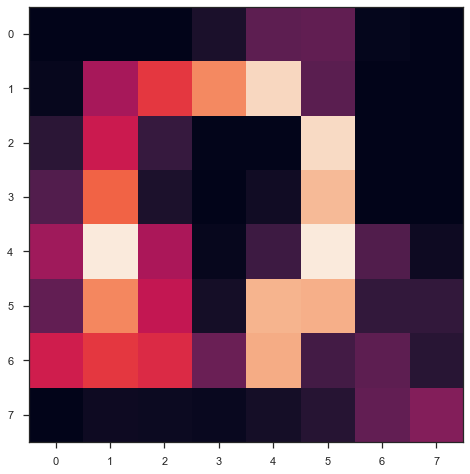

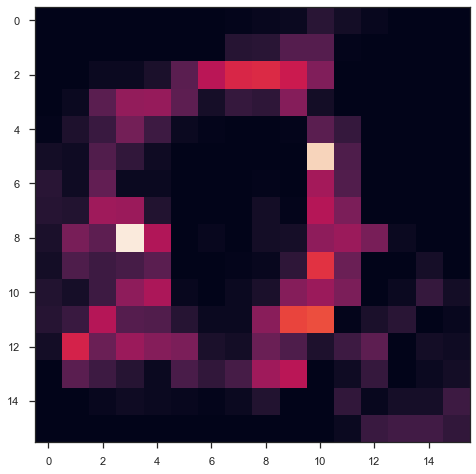

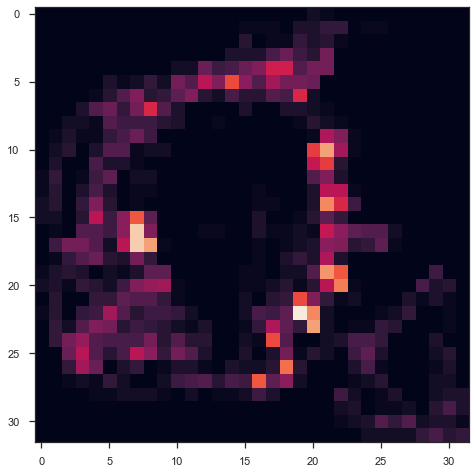

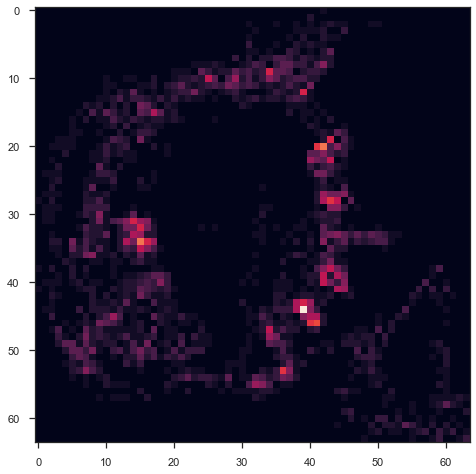

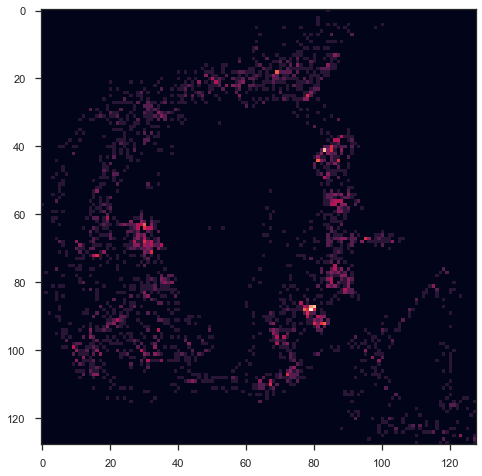

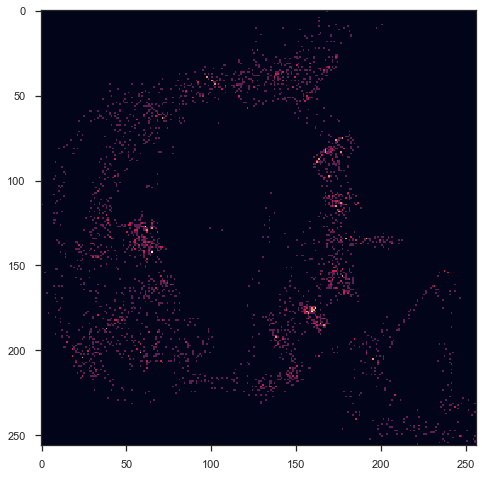

Error in callback <function flush_figures at 0x000001CC62CA39D8> (for post_execute):


KeyboardInterrupt: 

In [6]:
highest_power = 11 #limit the number of boxes to ensure object is continous (could also fill the trajectories to make continous)
scale = np.logspace(1, highest_power, num = highest_power, base = 2) #create a log scale. total number of boxes doubles each time
number_filled = []
dimensions = []
for b in scale:
    #use 2d histogram (heatmap) as boxes and measure the number of boxes to capture object as bins that have a non-zero count
    bins = b
    heatmap, xedges, yedges = np.histogram2d(-y, x, bins=int(bins)) 
    box_num = heatmap[heatmap > 0]
    number_filled.append(len(box_num))
    dimension = np.log(len(box_num))/np.log(b)
    dimensions.append(dimension)
    print("number of boxes:" + str(len(box_num)) + " out of " + str(len(heatmap.ravel())) + " dimension: " + str(dimension))
    f, ax = plt.subplots(figsize=(8,8))
    plt.imshow(heatmap)

Text(2, 7, 'dimension: 1.72')

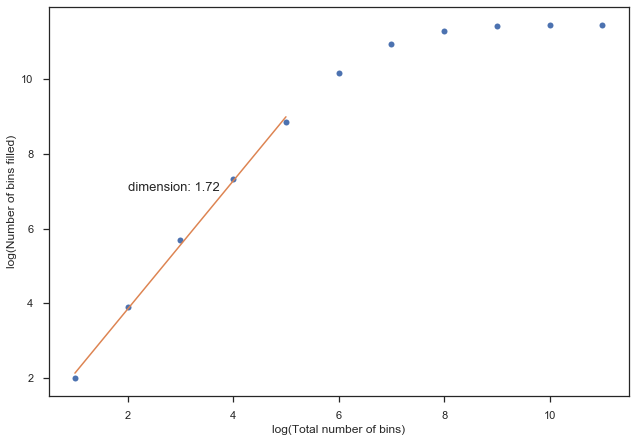

In [7]:
#visualize relationship between number of bins (1/boxlength) and how many boxes it takes to capture trajectory (number of bins with nonzero count)
#using log gives linear relationship between the two. slope of relationship is dimension of trajectory
plt.plot(np.log(scale)/np.log(2), np.log(number_filled)/np.log(2), "o") 
b, m = polyfit((np.log(scale)/np.log(2))[0:5], (np.log(number_filled)/np.log(2))[0:5], 1) 
plt.plot((np.log(scale)/np.log(2))[0:5], b+ m*(np.log(scale)/np.log(2))[0:5])
plt.ylabel("log(Number of bins filled)")
plt.xlabel("log(Total number of bins)")
plt.text(2,7, "dimension: " + "%.2f" % round(m, 2), size = 13)

number of boxes:2 out of 4 dimension: 1.0
number of boxes:4 out of 16 dimension: 1.0
number of boxes:8 out of 64 dimension: 1.0
number of boxes:16 out of 256 dimension: 1.0
number of boxes:32 out of 1024 dimension: 1.0
number of boxes:64 out of 4096 dimension: 1.0
number of boxes:128 out of 16384 dimension: 1.0
number of boxes:256 out of 65536 dimension: 1.0
number of boxes:512 out of 262144 dimension: 1.0
number of boxes:648 out of 1048576 dimension: 0.9339850002884624
number of boxes:648 out of 4194304 dimension: 0.8490772729895113


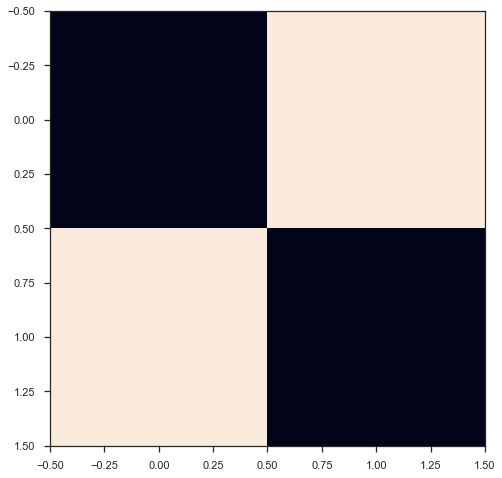

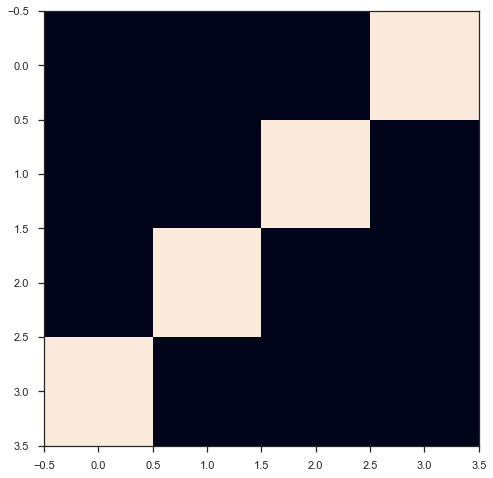

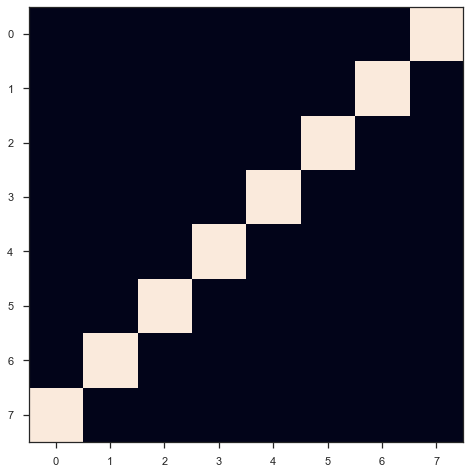

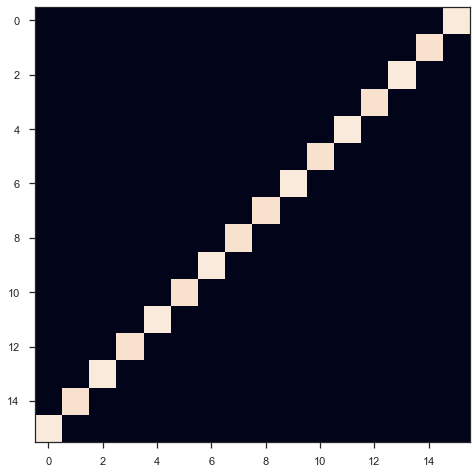

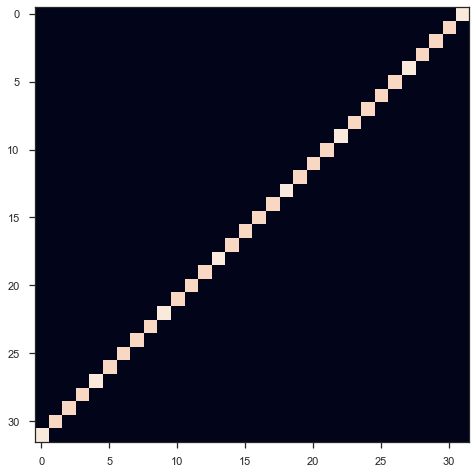

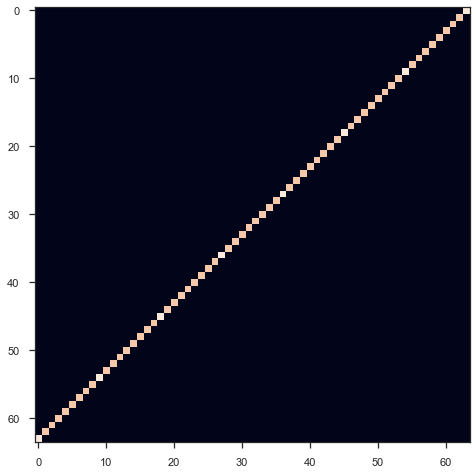

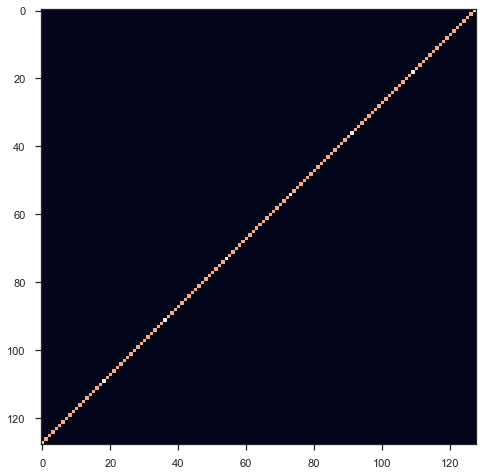

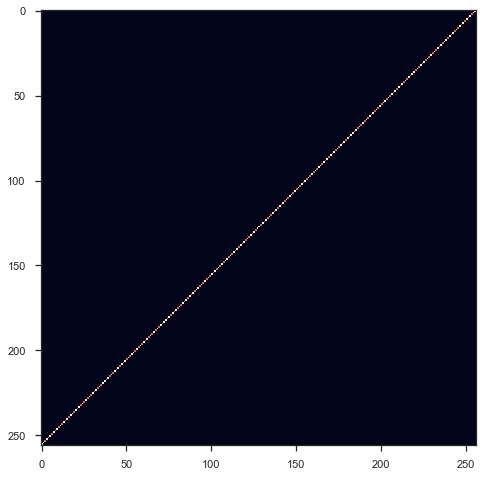

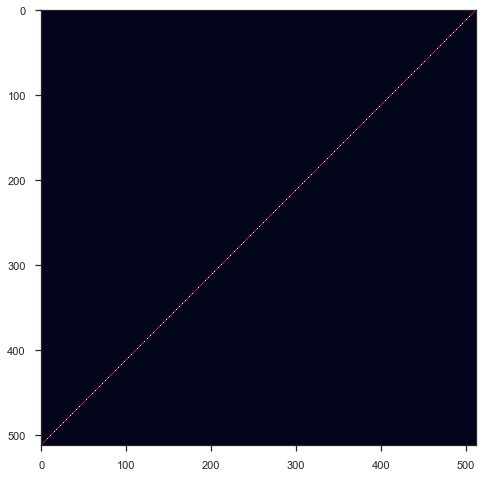

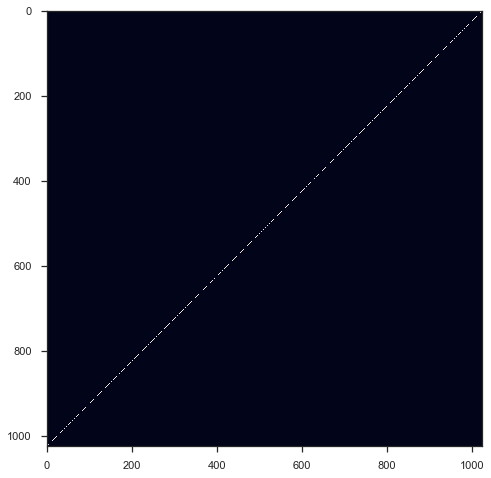

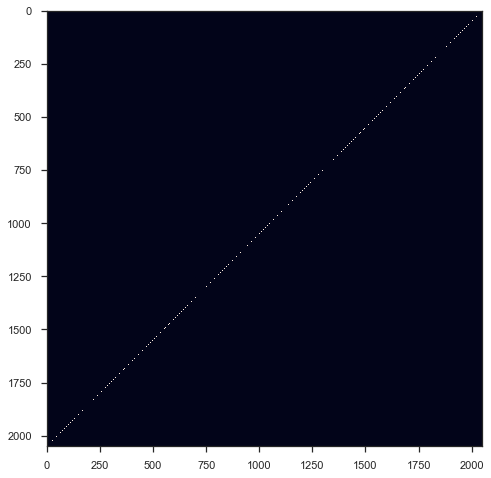

In [8]:
highest_power = 11 #limit the number of boxes to ensure object is continous (could also fill the trajectories to make continous)
scale = np.logspace(1, highest_power, num = highest_power, base = 2) #create a log scale. total number of boxes doubles each time
number_filled = []
dimensions = []
for b in scale:
    #use 2d histogram (heatmap) as boxes and measure the number of boxes to capture object as bins that have a non-zero count
    bins = b
    heatmap, xedges, yedges = np.histogram2d(-y_line, x_line, bins=int(bins)) 
    box_num = heatmap[heatmap > 0]
    number_filled.append(len(box_num))
    dimension = np.log(len(box_num))/np.log(b)
    dimensions.append(dimension)
    print("number of boxes:" + str(len(box_num)) + " out of " + str(len(heatmap.ravel())) + " dimension: " + str(dimension))
    f, ax = plt.subplots(figsize=(8,8))
    plt.imshow(heatmap)

Text(2, 7, 'dimension: 1.00')

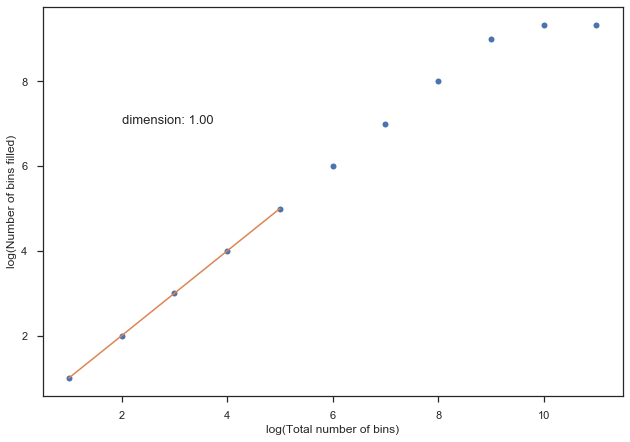

In [9]:
#visualize relationship between number of bins (1/boxlength) and how many boxes it takes to capture trajectory (number of bins with nonzero count)
#using log gives linear relationship between the two. slope of relationship is dimension of trajectory
plt.plot(np.log(scale)/np.log(2), np.log(number_filled)/np.log(2), "o") 
b, m = polyfit((np.log(scale)/np.log(2))[0:5], (np.log(number_filled)/np.log(2))[0:5], 1) 
plt.plot((np.log(scale)/np.log(2))[0:5], b+ m*(np.log(scale)/np.log(2))[0:5])
plt.ylabel("log(Number of bins filled)")
plt.xlabel("log(Total number of bins)")
plt.text(2,7, "dimension: " + "%.2f" % round(m, 2), size = 13)

In [10]:
df = pd.read_csv(source + '/L0.1_c-3_m10_0_20377.csv')

In [11]:
x_other,y_other = df.X_position.values, df.Y_position.values

Text(0.5, 0, 'X Position')

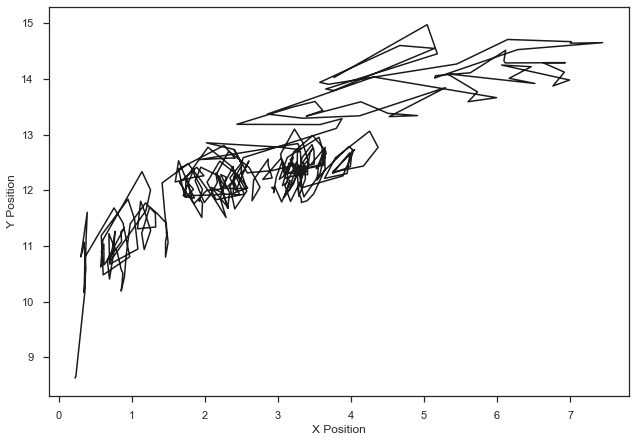

In [12]:
f, ax = plt.subplots()
plt.plot(x_other,y_other, c= "k")
plt.ylabel("Y Position")
plt.xlabel("X Position")

number of boxes filled: 3,  box width: 1/2,  dimension: 1.5849625007211563
number of boxes filled: 9,  box width: 1/4,  dimension: 1.5849625007211563
number of boxes filled: 18,  box width: 1/6,  dimension: 1.6131471927654584
number of boxes filled: 27,  box width: 1/8,  dimension: 1.5849625007211563
number of boxes filled: 33,  box width: 1/10,  dimension: 1.5185139398778873
number of boxes filled: 48,  box width: 1/12,  dimension: 1.5578858913022597
number of boxes filled: 58,  box width: 1/14,  dimension: 1.5385959846269732
number of boxes filled: 64,  box width: 1/16,  dimension: 1.5
number of boxes filled: 76,  box width: 1/18,  dimension: 1.4983309079377987
number of boxes filled: 90,  box width: 1/20,  dimension: 1.5020733695244102
number of boxes filled: 97,  box width: 1/22,  dimension: 1.479989695234729
number of boxes filled: 110,  box width: 1/24,  dimension: 1.4790436590175031
number of boxes filled: 120,  box width: 1/26,  dimension: 1.46941371654055
number of boxes fille

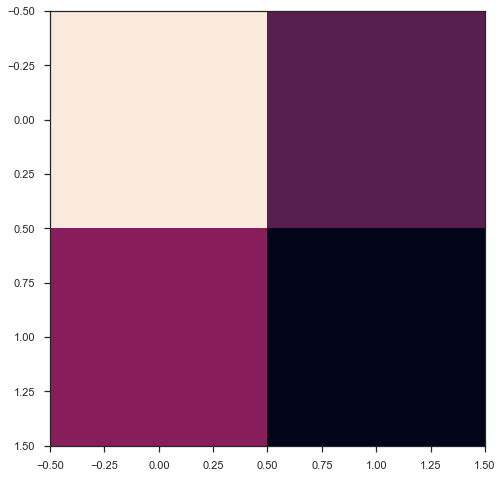

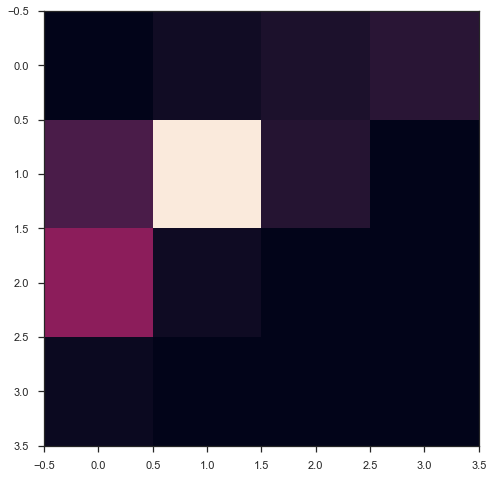

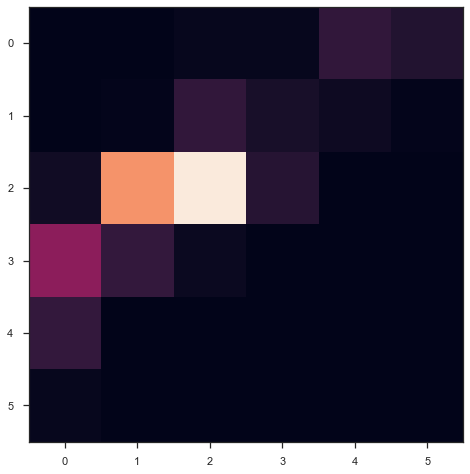

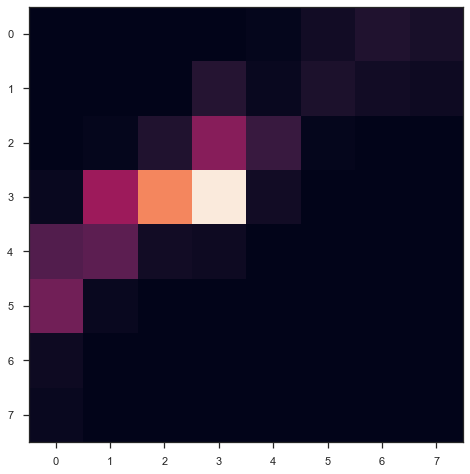

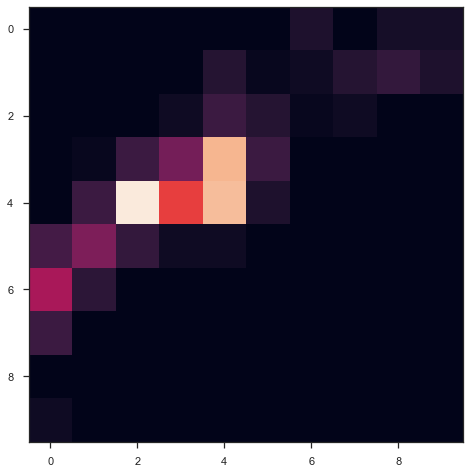

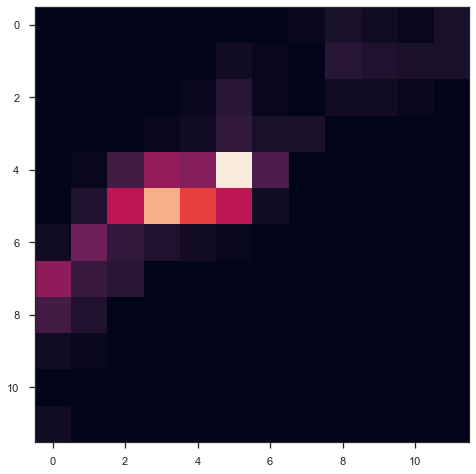

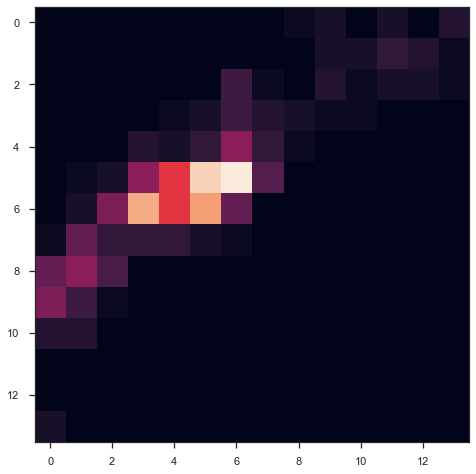

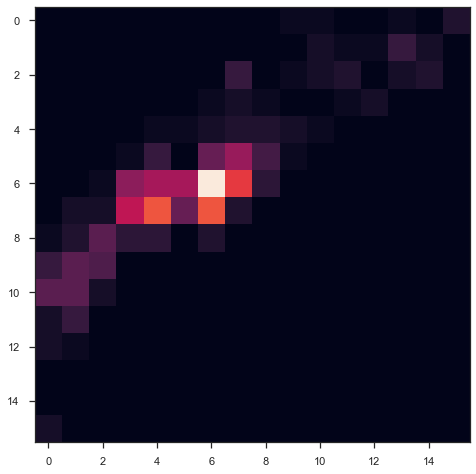

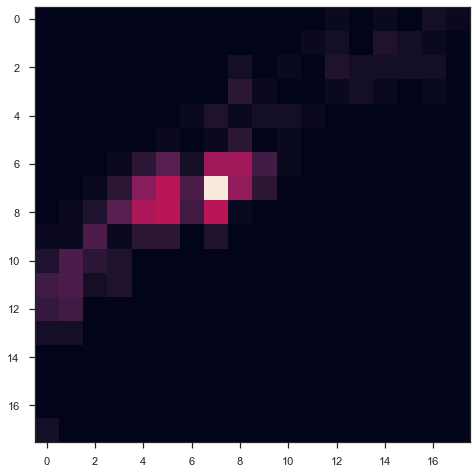

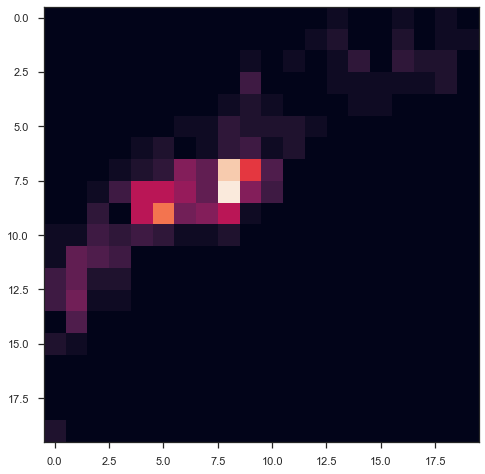

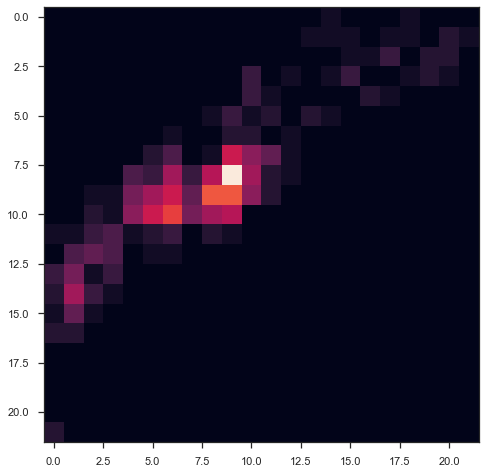

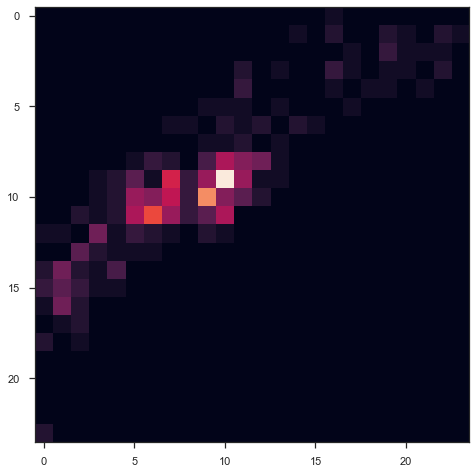

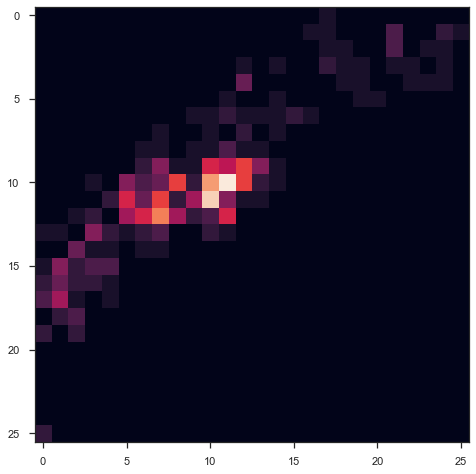

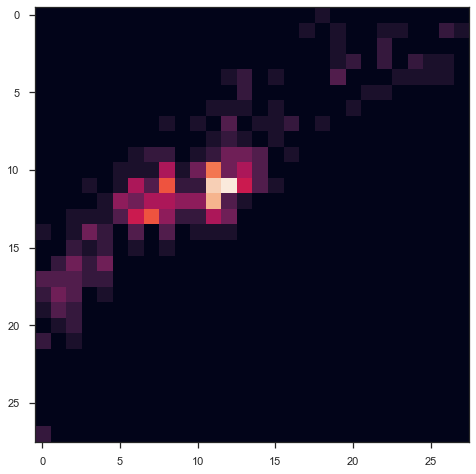

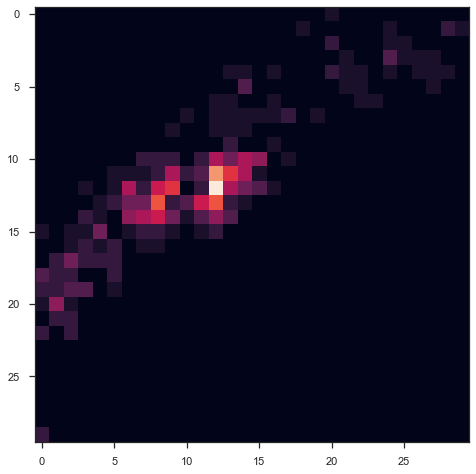

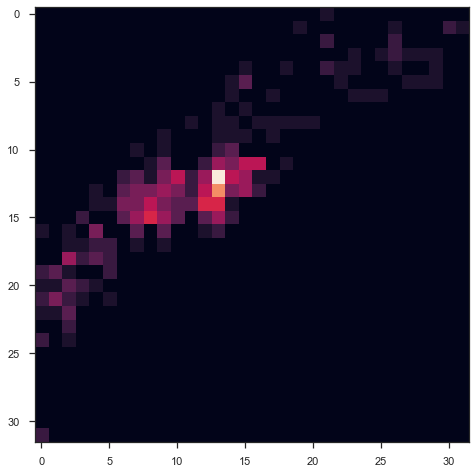

In [13]:
scale = np.arange(2,34,2) #create a log scale. total number of boxes doubles each time
number_filled = []
dimensions = []
for b in scale:
    #use 2d histogram (heatmap) as boxes and measure the number of boxes to capture object as bins that have a non-zero count
    bins = b
    heatmap, xedges, yedges = np.histogram2d(-y_other, x_other, bins=int(bins)) 
    box_num = heatmap[heatmap > 0]
    number_filled.append(len(box_num))
    dimension = np.log(len(box_num))/np.log(b)
    dimensions.append(dimension)
    print("number of boxes filled: " + str(len(box_num)) + ",  box width: 1/" + str(b) + ",  dimension: " + str(dimension))
    f, ax = plt.subplots(figsize=(8,8))
    plt.imshow(heatmap)

Text(2, 4.441642422609304, 'dimension: 1.38')

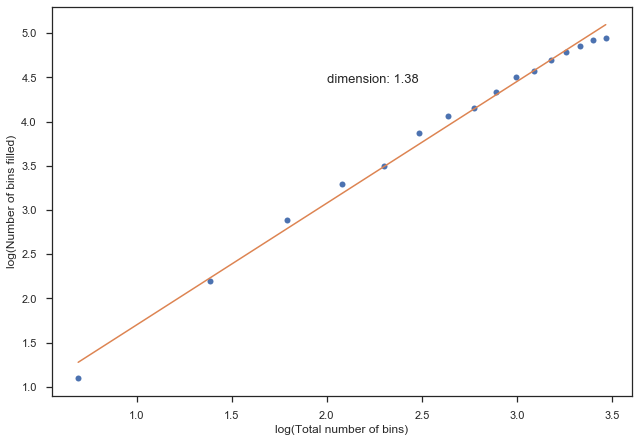

In [14]:
#visualize relationship between number of bins (1/boxlength) and how many boxes it takes to capture trajectory (number of bins with nonzero count)
#using log gives linear relationship between the two. slope of relationship is dimension of trajectory
plt.plot(np.log(scale), np.log(number_filled), "o") 
b, m = polyfit(np.log(scale), np.log(number_filled), 1) 
plt.plot(np.log(scale), b+ m*np.log(scale))
plt.ylabel("log(Number of bins filled)")
plt.xlabel("log(Total number of bins)")
plt.text(2,np.max(np.log(number_filled))-.5, "dimension: " + "%.2f" % round(m, 2), size = 13)

In [15]:
csv_list = glob.glob(source + "/*.csv")

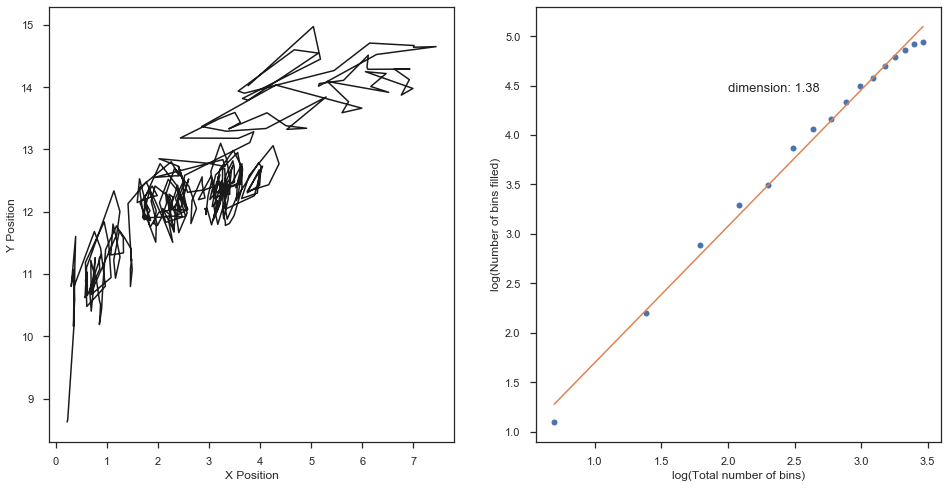

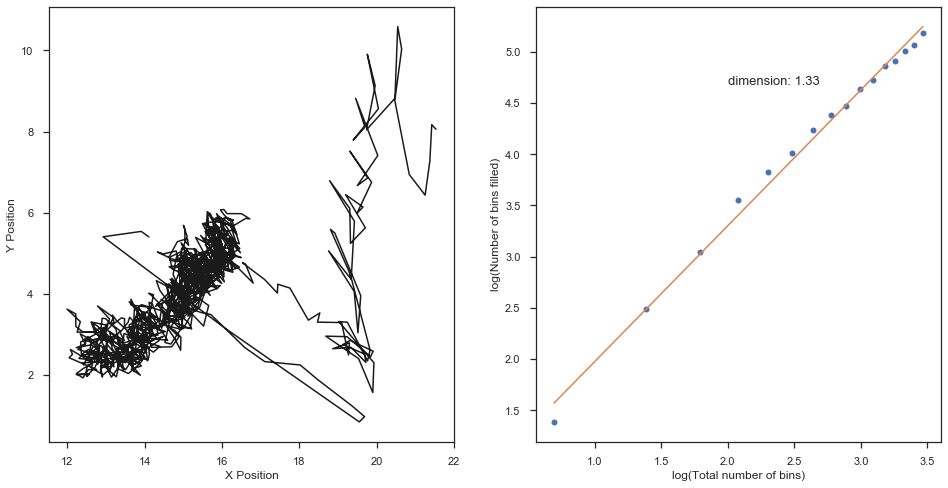

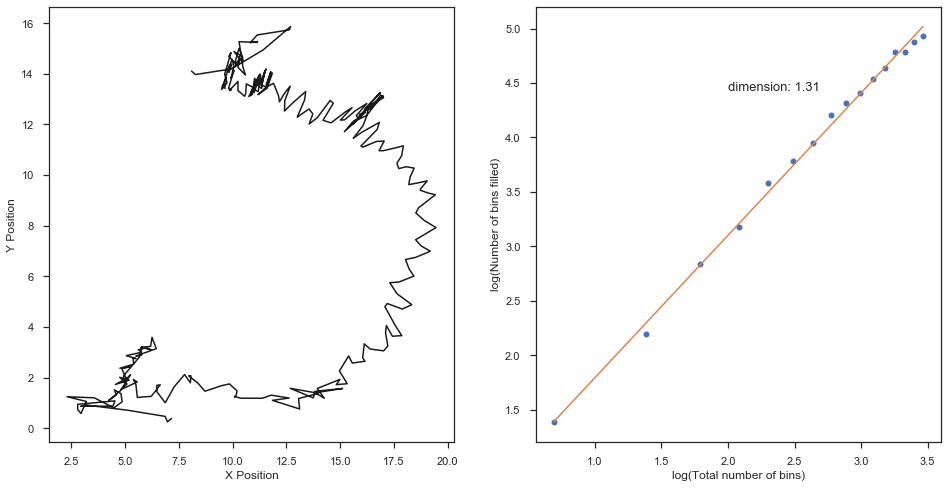

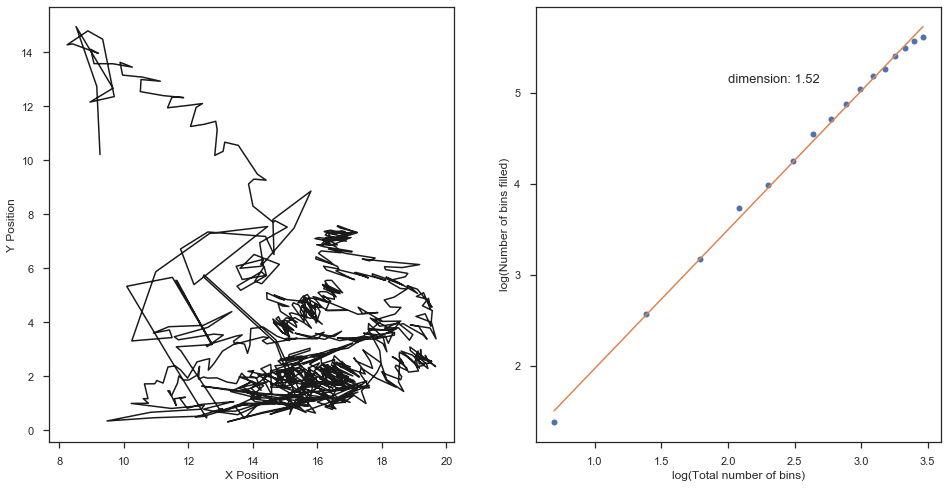

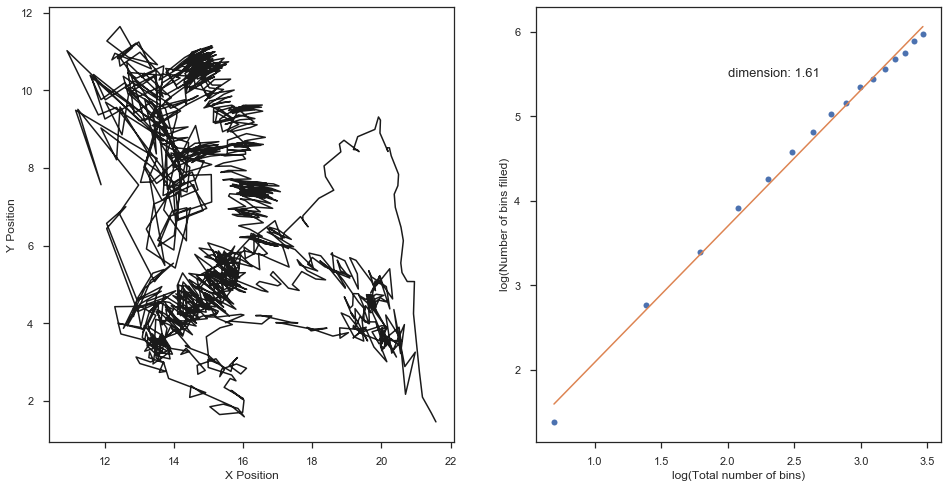

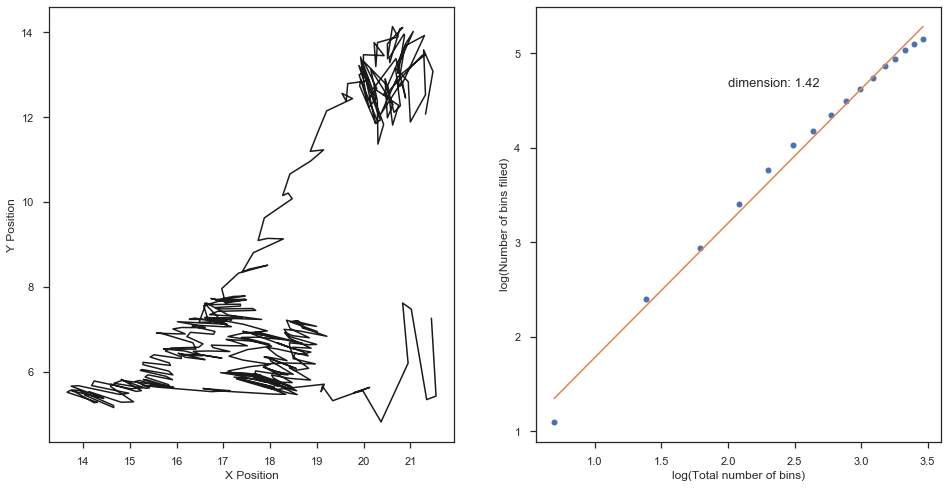

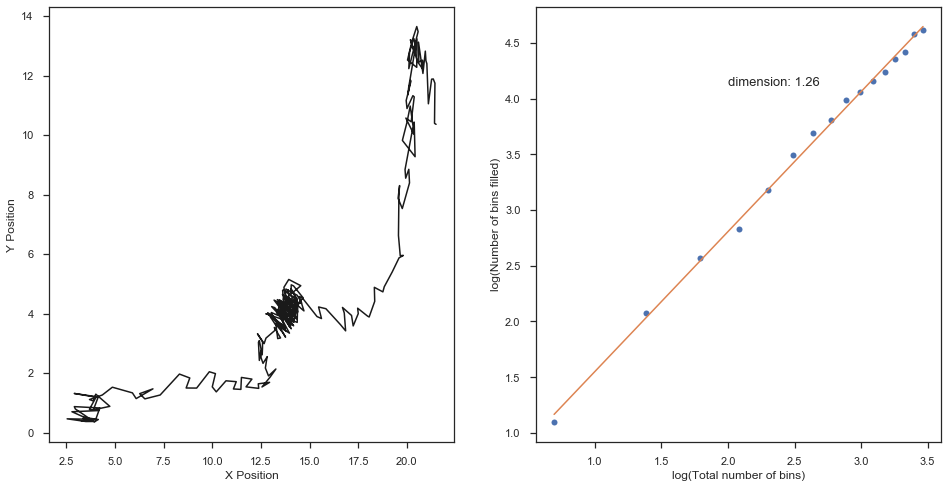

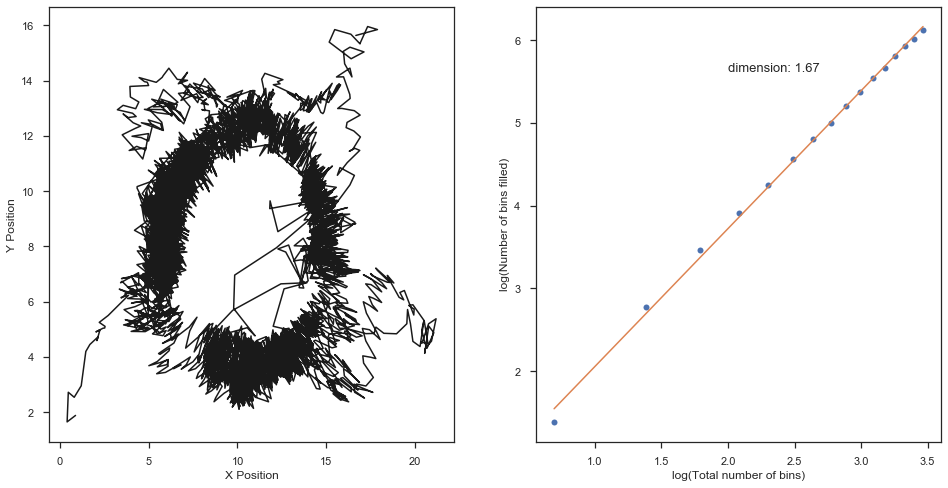

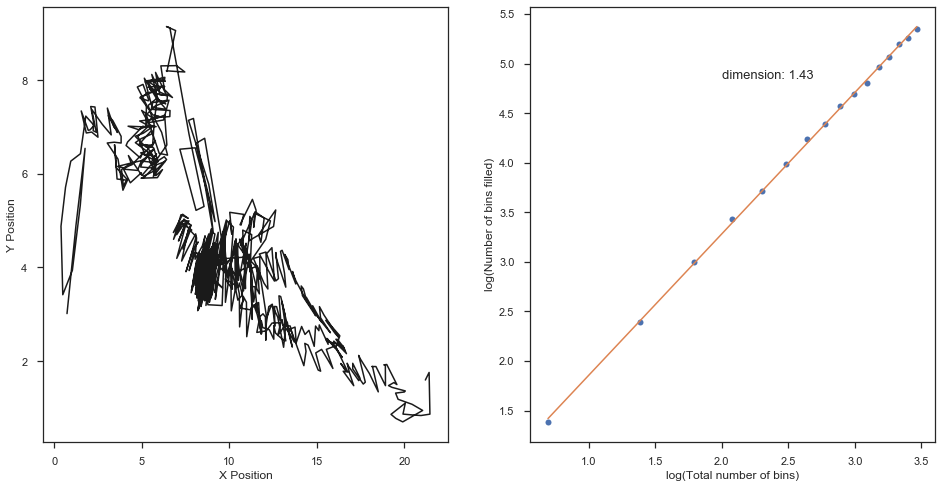

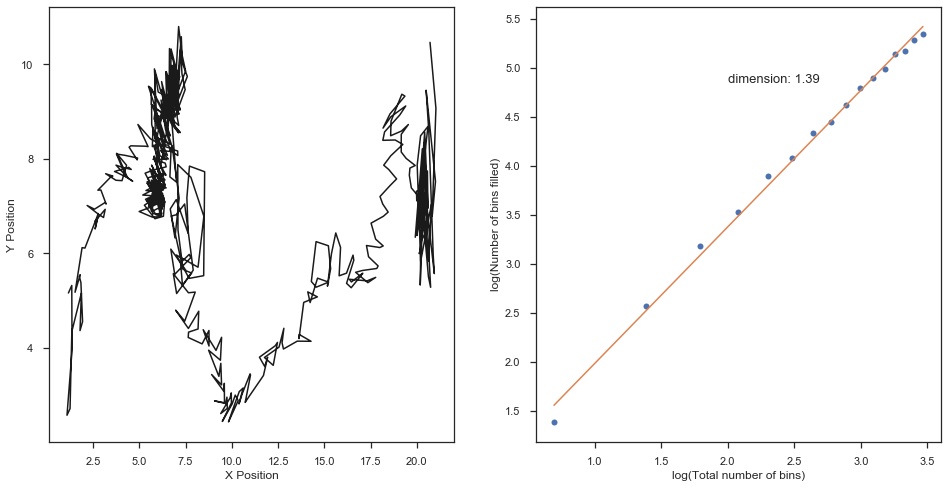

In [18]:
condition = []
dimension = []
for element in csv_list[:10]: 
    if element[61:].startswith("L0.1"):
        condition.append("Low")
    else:
        condition.append("High")
    f, ax = plt.subplots(1,2,figsize=(16,8))
    df = pd.read_csv(element)
    x,y = df.X_position.values, df.Y_position.values
    df
    scale = np.arange(2,34,2) #create a log scale. total number of boxes doubles each time
    number_filled = []
    for b in scale:
        #use 2d histogram (heatmap) as boxes and measure the number of boxes to capture object as bins that have a non-zero count
        bins = b
        heatmap, xedges, yedges = np.histogram2d(-y, x, bins=int(bins)) 
        box_num = heatmap[heatmap > 0]
        number_filled.append(len(box_num))
    ax[0].plot(x,y, c = 'k')
    ax[0].set_ylabel("Y Position")
    ax[0].set_xlabel("X Position")
    ax[1].plot(np.log(scale), np.log(number_filled), "o") 
    b, m = polyfit(np.log(scale), np.log(number_filled), 1)
    dimension.append(m)
    ax[1].plot(np.log(scale), b+ m*np.log(scale))
    ax[1].set_ylabel("log(Number of bins filled)")
    ax[1].set_xlabel("log(Total number of bins)")
    ax[1].text(2,np.max(np.log(number_filled))-.5, "dimension: " + "%.2f" % round(m, 2), size = 13)
    plt.savefig(fig_path + "\\TrajectoryComparison\\" + element[61:-4] + ".png")
new_df = pd.DataFrame({"condition": condition, "dimension": dimension})

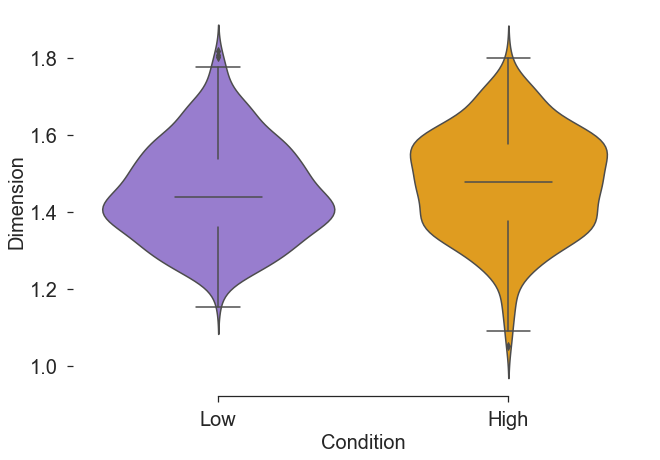

In [17]:
ax = sns.violinplot(x="condition", y="dimension", data = new_df, inner = None, palette = ['mediumpurple','orange'])
sns.boxplot(x="condition", y="dimension", data = new_df, width = 0.3)
plt.xlabel("Condition", size = 20)
plt.ylabel("Dimension", size = 20)
ax.set_xticklabels(["Low","High"], size = 20)
sns.despine(trim=True, left=True)
for tick in ax.get_yticklabels():
    tick.set_fontsize(20) 
plt.savefig(fig_path + "\DimensionComparison\dimensionComparison.png")